In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Area = 200                  
pixel_list = [100, 200, 500, 1000, 2000]

bright_width = 30           
dark_width = 50              
cycle_length = bright_width + dark_width

I_dark = 500
I_bright = 10000

noise_level = 2000

for Pixels in pixel_list:
    x = np.linspace(0, Area, Pixels)
    y = np.linspace(0, Area, Pixels)
    X, Y = np.meshgrid(x, y)

    pattern_mask = (X % cycle_length) < bright_width

    Image = np.zeros((Pixels, Pixels))
    Image[pattern_mask] = I_bright
    Image[~pattern_mask] = I_dark
    
    noise = np.random.normal(0, noise_level, Image.shape)
    Image_noise = Image + noise
        
    F = np.fft.fft2(Image_noise)
    Fshift = np.fft.fftshift(F)
    magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)
    
    plt.figure(figsize=(15, 4))

    plt.subplot(131)
    plt.imshow(Image, cmap='gray', extent=[0, Area, 0, Area])
    plt.title(f'Original ({Pixels}x{Pixels})')
    plt.xlabel('Microns')

    plt.subplot(132)
    plt.imshow(Image_noise, cmap='gist_heat', extent=[0, Area, 0, Area])
    plt.title('Noisy Image')

    plt.subplot(133)
    plt.imshow(magnitude_spectrum, cmap='inferno')
    plt.title('FFT Magnitude')

    plt.tight_layout()
    plt.show()



In [ ]:
for Pixels in pixel_list:

    rows, cols = Image.shape
    crow, ccol = int(rows/2), int(cols/2) # หาจุดกึ่งกลาง

    r_inner = 0
    r_outer = 50

    # สร้าง Mask เป็นรูปโดนัท (Bandpass)
    mask = np.zeros((rows, cols), np.uint8)
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = ((x - center[0])**2 + (y - center[1])**2 >= r_inner**2) & \
            ((x - center[0])**2 + (y - center[1])**2 <= r_outer**2)
    mask[mask_area] = 1

    # ประยุกต์ใช้ Mask กับรูป FFT ที่ Shift แล้ว
    fshift_filtered = Fshift * mask

    # --- แปลงกลับเป็นรูปภาพ (Inverse FFT) ---
    f_ishift = np.fft.ifftshift(fshift_filtered) # Shift กลับ
    img_back = np.fft.ifft2(f_ishift)            # Inverse FFT
    img_back = np.abs(img_back)                  # เอาเฉพาะขนาด (Magnitude)

    # --- แสดงผลลัพธ์ ---
    plt.figure(figsize=(15, 5))

    # แสดง Mask ที่เราสร้าง
    plt.subplot(131)
    plt.imshow(mask, cmap='gray')
    plt.title('Bandpass Filter Mask')
    plt.axis('off')

    # แสดง Spectrum หลัง Filter
    plt.subplot(132)
    # ใช้ log เพื่อให้เห็นรายละเอียด Spectrum ชัดขึ้น
    magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)
    plt.imshow(magnitude_spectrum_filtered, cmap='inferno')
    plt.title('Filtered Spectrum')
    plt.axis('off')

    # แสดงรูปที่กู้คืนมาได้ (Denoised Image)
    plt.subplot(133)
    plt.imshow(img_back, cmap='gray')
    plt.title('Result Image (Noise Removed)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

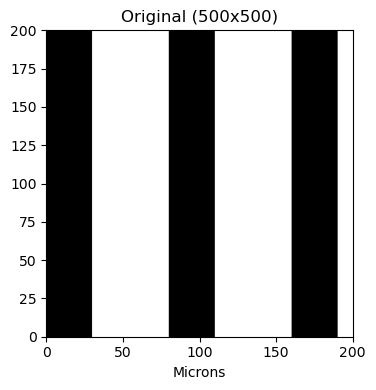

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Area = 200                  
Pixels = 500

bright_width = 30           
dark_width = 50              
cycle_length = bright_width + dark_width

dark = 500
bright = 10000

noise_level = 2000

x = np.linspace(0, Area, Pixels)
y = np.linspace(0, Area, Pixels)
X, Y = np.meshgrid(x, y)

pattern_mask = (X % cycle_length) < bright_width

Image = np.zeros((Pixels, Pixels))
Image[pattern_mask] = 10000
Image[~pattern_mask] = 500

plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.imshow(Image, cmap='gray', extent=[0, Area, 0, Area])
plt.title(f'Original ({Pixels}x{Pixels})')
plt.xlabel('Microns')
plt.tight_layout()
plt.show()